In [1]:
import math
import random
import time
import numpy as np
import random as r
import matplotlib.pyplot as plt

## Viaje por el río - Programación dinámica

In [2]:
cost_matrix = [
    [999,   5, 4,   3,   999, 999, 999], #nodo 1
    [999, 999, 999, 2,   3,   999, 11],  #nodo 2
    [999, 999, 999, 1,   999, 4,   10],  #...
    [999, 999, 999, 999, 5,   6,   9],
    [999, 999, 999, 999, 999, 999, 4],
    [999, 999, 999, 999, 999, 999, 3],
    [999, 999, 999, 999, 999, 999, 999]
]

def best_route(cost_matrix):
    l = len(cost_matrix)
    routes = [ ['']*l for i in ['']*l ]
    costs = [ [0]*l for i in [0]* l ]

    for node in range(l): #nodo
        for dest in range(l): #destino
            m = cost_matrix[node][dest]
            routes[node][dest] = node

            for ndest in range(l):
                if costs[node][ndest] + cost_matrix[ndest][dest] < m:
                    m = costs[node][ndest] + cost_matrix[ndest][dest]
                    routes[node][dest] = ndest

                costs[node][dest] = m

    return routes, costs


def calc_route(routes, start, end):
    if start == end:
        return start
    else:
        return '%s, %s' % (calc_route(routes, start, routes[start][end]), end)


routes, costs = best_route(cost_matrix)

print('\nRUTAS CODIFICADAS:')
for i in routes:
    print(i)

print('\nCOSTES DE RUTA CODIFICADOS:')
for i in costs:
    print(i)

print('\nRuta para ir desde el nodo 0 al 6')
calc_route(routes, 0, 6)


RUTAS CODIFICADAS:
[0, 0, 0, 0, 1, 2, 5]
[1, 1, 1, 1, 1, 3, 4]
[2, 2, 2, 2, 3, 2, 5]
[3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6]

COSTES DE RUTA CODIFICADOS:
[999, 5, 4, 3, 8, 8, 11]
[999, 999, 999, 2, 3, 8, 7]
[999, 999, 999, 1, 6, 4, 7]
[999, 999, 999, 999, 5, 6, 9]
[999, 999, 999, 999, 999, 999, 4]
[999, 999, 999, 999, 999, 999, 3]
[999, 999, 999, 999, 999, 999, 999]

Ruta para ir desde el nodo 0 al 6


'0, 2, 5, 6'

## Asignación de tareas - Ramificación y poda

In [9]:
#Agentes son las filas
#Trabajos es cada índice del array, y el numero que contiene es el coste de ese trabajo para ese agente
N = 5
costs = [ [r.randrange(30)*N for x in range(N)] for i in range(N)]
# costs = [
#     [11, 12, 18, 40],
#     [14, 15, 13, 22],
#     [11, 17, 19, 23],
#     [17, 14, 20, 28]
# ]

#Inicializamos la solucion con valores altos para que la primera vez nos pille cualquier solucion
solution = [{'i': -1, 'v': 999}]*len(costs)

#Obtenemos los nodos que necesitams para la capa actual
def children(costs, x, k):
    if k == 0: #si es la primera capa obtenemos todos los nodos
        return [{'i': i, 'v': v} for i, v in enumerate(costs[k])]

    not_indx = [v['i'] for i, v in enumerate(x) if i <= k]

    #Obtenemos solo los nodos sobre los que no hayamos trabajado antes
    children = [{'i': i, 'v': v} for i, v in enumerate(costs[k]) if i not in not_indx]
    return children

#Es susceptible de ser la solucion?
def maybe(current_sol, x, k):
    indxs = [v['i'] for i, v in enumerate(x) if i <= k]
    if len(indxs) != len(set(indxs)):
        print(indxs, set(indxs))
        return False

    s = sum([v['v'] for i, v in enumerate(current_sol)])
    sm = sum([v['v'] for i, v in enumerate(x) if i <= k])

    return sm < s #miramos si el coste actual es menor al coste anterior

#Funcion para guardar la solucion de forma funcional
def store_solution(storage, sol):
    for i, v in enumerate(storage):
        storage[i] = sol[i]


def branch_and_bound(costs, current_sol, x, k=0):
    P = children(costs, x, k)
    x = x[:k+1]
    for i in P:
        if len(x) <= k:
            x.append(i)
        else:
            x[k] = i

        if maybe(current_sol, x, k):
            if k == len(costs) - 1:
                print('New solution: {}, total cost: {}'.format(x, sum([v['v'] for i, v in enumerate(x)])))
                store_solution(current_sol, x)
            else:
                branch_and_bound(costs, current_sol, x, k+1)
    
branch_and_bound(costs, solution, [0])
print('\nLa mejor solución es: {}, con un coste total de: {}'.format([v['i'] for i, v in enumerate(solution)], sum([v['v'] for i, v in enumerate(solution)])))

New solution: [{'i': 0, 'v': 90}, {'i': 1, 'v': 90}, {'i': 2, 'v': 240}, {'i': 3, 'v': 180}, {'i': 4, 'v': 140}, {'i': 5, 'v': 20}, {'i': 6, 'v': 130}, {'i': 7, 'v': 60}, {'i': 8, 'v': 220}, {'i': 9, 'v': 110}], total cost: 1280
New solution: [{'i': 0, 'v': 90}, {'i': 1, 'v': 90}, {'i': 2, 'v': 240}, {'i': 3, 'v': 180}, {'i': 4, 'v': 140}, {'i': 5, 'v': 20}, {'i': 6, 'v': 130}, {'i': 8, 'v': 150}, {'i': 7, 'v': 100}, {'i': 9, 'v': 110}], total cost: 1250
New solution: [{'i': 0, 'v': 90}, {'i': 1, 'v': 90}, {'i': 2, 'v': 240}, {'i': 3, 'v': 180}, {'i': 4, 'v': 140}, {'i': 5, 'v': 20}, {'i': 6, 'v': 130}, {'i': 9, 'v': 0}, {'i': 7, 'v': 100}, {'i': 8, 'v': 220}], total cost: 1210
New solution: [{'i': 0, 'v': 90}, {'i': 1, 'v': 90}, {'i': 2, 'v': 240}, {'i': 3, 'v': 180}, {'i': 4, 'v': 140}, {'i': 5, 'v': 20}, {'i': 7, 'v': 0}, {'i': 8, 'v': 150}, {'i': 9, 'v': 170}, {'i': 6, 'v': 0}], total cost: 1080
New solution: [{'i': 0, 'v': 90}, {'i': 1, 'v': 90}, {'i': 2, 'v': 240}, {'i': 3, 'v': 

## Asignación de tareas - Fuerza bruta

In [6]:
def bruteforce(costs):
    l = len(costs[0])
    sol = []
    sum_sol = 999

    combinations = []
    #Crea una lista con todas las permitaciones posibles de los índices
    for ia, a in enumerate(costs):
        for ib, b in enumerate(costs):
            for ic, c in enumerate(a):
                for id, d in enumerate(b):
                    if len([ia, ib, ic, id]) == len(set([ia, ib, ic, id])):
                        combinations.append([ia, ib, ic, id])
    
    #Encuentra la opcion más asequible de todas las permutaciones
    for comb in combinations:
        _s = []
        for i, idx in enumerate(comb):
            _s.append(costs[i][idx])

        s = sum(_s)
        if s < sum_sol:
            sol = comb
            sum_sol = s

        _s = []

    return sum_sol, sol

cost, sol = bruteforce(costs)
print('\nLa mejor solución es: {}, con un coste total de: {}'.format(sol, cost))


La mejor solución es: [2, 3, 4, 1], con un coste total de: 50


## **¿Que complejidad tiene el algoritmo por fuerza bruta?**
#### De acuerdo a mi calculo la complejidad del algoritmo es  2 + (4 * n!)
## **¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?**
#### Dependerá de la potencia del equipo, al ser un orden de complejidad factorioal, deja de ser asequible cuando la dimensionalidad del problema crece
## **¿Hay algún valor de la dimensión a partir de la cual el algoritmo de ramificación y poda deja de ser una opción válida?**
#### De acuerdo a las pruebas la dimension 14 es donde el algoritmo empieza a presentar una lentitud considerable

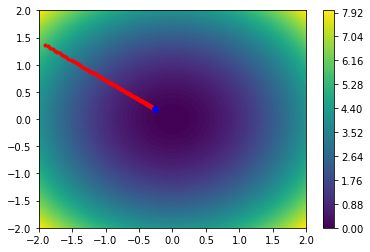

In [69]:
# func = lambda x: np.sin(1 / 2 * x[0] ** 2 - 1 / 4 * x[1] ** 2 + 3) * np.cos(2 * x
# [0] + 1 - np.e ** x[1])

func = lambda X: X[0] ** 2 + X[1] ** 2 

res = 100

_X = np.linspace(-2, 2, res)
_Y = np.linspace(-2, 2, res)

_Z = np.zeros((res, res))

#Dibujamos el mapa de altura en 2D
for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x, y])

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()


T = np.random.rand(2) * 4 - 2
_T = np.copy(T)

h = 0.0001
lr = 0.01 #learn rate
iters = 100

grad = np.zeros(2)

for i in range(iters):
    for it, ih in enumerate(T):
        _T = np.copy(T)
        _T[it] = _T[it] + h
        _func = (func(_T) - func(T)) / h # derivada de la funcion: (f(x + h) - f(x)) / h
        grad[it] = _func

    T = T - lr * grad # descenso del gradient

    
    plt.plot(T[0], T[1], '.', c='red')

plt.plot(T[0], T[1], 'o', c='blue')

plt.show()